# PV056 project

### Follow the instructions and run the cells in this notebook to reproduce all the results.

In [6]:
!pip3 install requests
!pip3 install matplotlib
!pip3 install pandas

^C


In [2]:
import os
import random

import requests
import pandas as pd
import matplotlib.pyplot as plt


os.environ["WANDB_DISABLED"] = "true"

C:\Users\haemk\SemEval2025\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the datasets

In [7]:
dataset_parts = ["train", "test", "valid"]
for dataset_part in dataset_parts:
    url = f"https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/refs/heads/main/data/incidents_{dataset_part}.csv"
    response = requests.get(url)

    with open(f"incidents_{dataset_part}.csv", "wb") as f:
        f.write(response.content)

trainset = pd.read_csv('incidents_train.csv', index_col=0)
validset = pd.read_csv('incidents_valid.csv', index_col=0)
testset = pd.read_csv('incidents_valid.csv', index_col=0)

for dataset in [trainset, validset, testset]:
    dataset = dataset.rename(columns={"hazard-category": "hazard_category", "product-category": "product_category"})

## Explore the data

In [18]:
trainset.sample()

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
161,2003,7,3,au,Kadac Pty Ltd—Whole Earth Brand Organic Cornfl...,PRA No. 2003/6291 Date published 3 Jul 2003 Pr...,allergens,cereals and bakery products,cereals containing gluten and products thereof,corn


In [ ]:
trainset.info()

In [ ]:
trainset.head()

In [26]:
for i in range(10):
    x = random.randint(0, len(trainset))
    print(trainset["text"][x])       # change the column name to view another column data
    print()
    print("XXX")
    print()

Notice This archive of previously issued food recalls and allergy alerts is provided for reference and research purposes. Users should note that the products listed in the archive have been subject to removal from the marketplace or appropriate corrective action. Food recalls or allergy alerts are not an indication of the food safety status of products produced at a later date. Allergy Alert - Pinnacle Foods Group LLC Issues Allergy Alert on undeclared soy protein in Aunt Jemima® Frozen Pancakes Recall / advisory date: January 27, 2012 Reason for recall / advisory: Allergen - Soy Hazard classification: Class 1 Company / Firm: Pinnacle Foods Canada Corporation Distribution: National Extent of the distribution: Retail Reference number: 6960 Contents Advisory details More information Photos Media enquiries Advisory details Ottawa, January 27, 2012 - The following press release is being issued on behalf of Pinnacle Food Group LLC on January 27, 2012: 399 Jefferson Road, NJ 07054 January 27

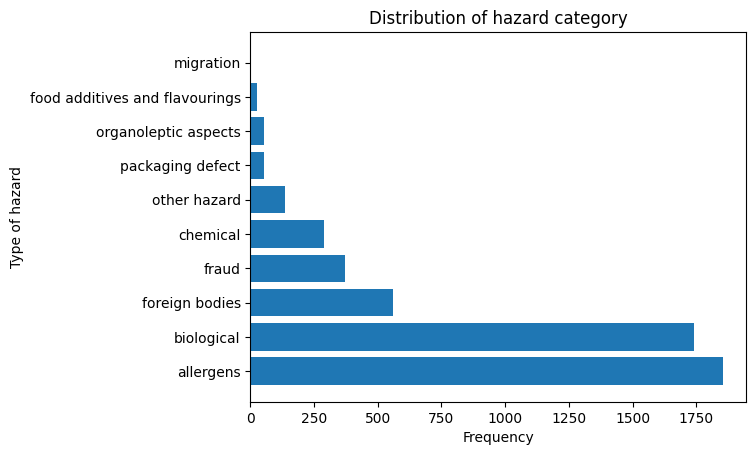

In [30]:
#DISTRIBUTION OF HAZARDS IN DATASET
fig, ax = plt.subplots()

ax.barh(trainset['hazard_category'].value_counts().index.to_list(), trainset['hazard_category'].value_counts().values, orientation='horizontal')

plt.xlabel('Frequency')
plt.ylabel('Type of hazard')
plt.title('Distribution of hazard category')
plt.show()

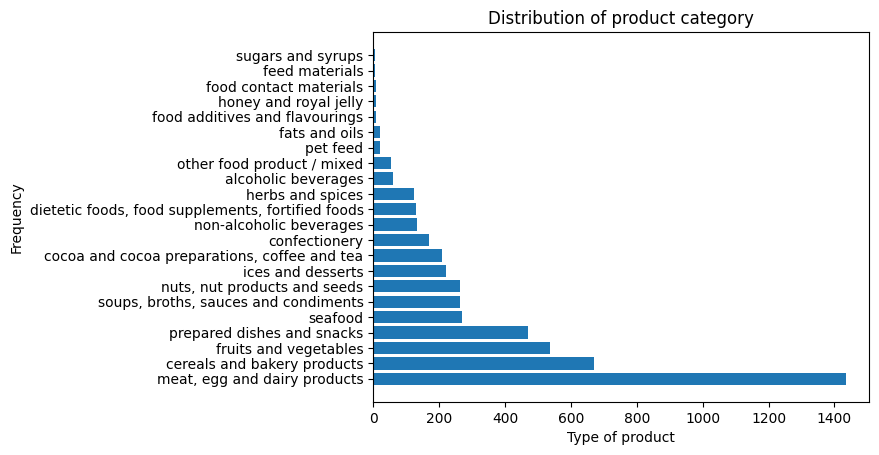

In [31]:
#DISTRIBUTION OF PRODUCT TYPES IN DATASET
fig, ax = plt.subplots()

ax.barh(trainset['product_category'].value_counts().index.to_list(), trainset['product_category'].value_counts().values, orientation='horizontal')

plt.xlabel('Type of product')
plt.ylabel('Frequency')
plt.title('Distribution of product category')
plt.show()


## Generate synthetic data for rare product and hazard categories

In [4]:
from food_hazard_detection.balance_dataset import (generate_prompt_triplets_by_hazard, generate_prompt_triplets_by_product,
                             generate_synthetic_data)

from food_hazard_detection import settings
from food_hazard_detection.settings import FILES_DIR, SYNTHETIC_DATA_DIR

rare_hazard_categories = ["migration", "food additives and flavourings",
                              "organoleptic aspects", "packaging defect"]
rare_product_categories = ["sugars and syrups", "feed materials", "food contact materials",
                           "honey and royal jelly", "food additives and flavourings", "fats and oils",
                           "pet feed", "other food product / mixed", "alcoholic beverages"]

In [ ]:
combinations = generate_prompt_triplets_by_hazard(rare_hazard_categories, trainset)
generate_synthetic_data(SYNTHETIC_DATA_DIR / "synthetic_data_hazard.csv",
                        FILES_DIR / "prompts/generate_synthetic_data.md", combinations)

combinations = generate_prompt_triplets_by_product(rare_product_categories, trainset)
generate_synthetic_data(SYNTHETIC_DATA_DIR / "synthetic_data_product.csv",
                        FILES_DIR / "prompts/generate_synthetic_data.md", combinations)

The data produced by Mistral are not perfect. So at this point some manual curration is needed. Because of that, we use later in the code already preprocessed synthetic data.

Load and check the generated data.

In [5]:
synthetic_hazard = pd.read_csv(SYNTHETIC_DATA_DIR / "synthetic_data_hazard_processed.csv", sep=settings.SEPARATOR, engine='python', on_bad_lines='warn')
synthetic_product = pd.read_csv(SYNTHETIC_DATA_DIR / "synthetic_data_product_processed.csv", sep=settings.SEPARATOR, engine='python', on_bad_lines='warn')
print(synthetic_hazard.info())
print(synthetic_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        32 non-null     int64 
 1   year              32 non-null     int64 
 2   month             32 non-null     int64 
 3   day               32 non-null     int64 
 4   country           32 non-null     object
 5   title             32 non-null     object
 6   text              32 non-null     object
 7   hazard-category   32 non-null     object
 8   product-category  32 non-null     object
 9   hazard            32 non-null     object
 10  product           32 non-null     object
dtypes: int64(4), object(7)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        60 non-null     object
 1 